<br><br><br>

# Detecção de Anomalias


<br><br>

Antes de falarmos sobre __detecção de anomalias__ precisamos definir alguns __conceitos básicos em estatística:__

<br>

## 1. Variáveis Aleatórias

<br>


Uma __variável aleatória__ é uma __variável quantitativa, cujo resultado (valor) depende de fatores aleatórios.__

Uma variável aleatória pode ser uma medição de um parâmetro que pode gerar valores diferentes. O conceito de variável aleatória é essencial em estatística e em outros métodos quantitativos para a representação de fenômenos incertos.

Um __exemplo__ de uma variável aleatória é o __resultado do lançamento de um dado__ que pode dar qualquer número entre 1 e 6. Embora possamos conhecer os seus possíveis resultados, o resultado em si depende de fatores de sorte (álea). 

<br>

### 1.1 Variáveis aleatórias discretas

<br>

Considere que jogamos um dado com 6 faces. Qual a probabilidade de sair o número 1? E de sair outro valor qualquer?

Intuitivamente, a resposta seria 1/6.

Vamos representar por X a variável aleatória: resultado do lançamento de um dado. Dessa forma, X pode assumir os valores 1,2,3,4,5,6. Em notação matemática:

X $\in$ {1,2,3,4,5,6} - leia-se X pertence ao conjunto {1,2,3,4,5,6}

$Prob$(X = 1) = 1/6

$Prob$(X = 2) = 1/6

$Prob$(X = 3) = 1/6

$Prob$(X = 4) = 1/6

$Prob$(X = 5) = 1/6

$Prob$(X = 6) = 1/6

Desta forma, podemos definir a __distribuição__ de X como uma função que descreve a __probabilidade relativa de uma variável aleatória tomar um valor dado.__ Neste caso, a distribuição estaria representada pelas probabilidades acima.


Veja que podemos alterar a lei de probabilidade: por exemplo, podemos __supor__ que tenhamos um dado irregular, cujas probabilidades são dadas por:

$Prob$(X = 1) = 3/10

$Prob$(X = 2) = 2/10

$Prob$(X = 3) = 2/10

$Prob$(X = 4) = 1/10

$Prob$(X = 5) = 1/10

$Prob$(X = 6) = 1/10

Desta forma, é 3 vezes mais provável que, ao lançarmos esse dado irregular, saia o valor 1 do que o valor 6, por exemplo.

__Obs.:__ É fundamental que a soma das probabilidades dê 1, quando considerados todos os cenários possíveis!

Vamos implementar no python esses exemplos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def lanca_dado_regular():
    return np.random.choice([1,2,3,4,5,6], size = 1, p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])[0]

def lanca_dado_irregular(probs):
    return np.random.choice([1,2,3,4,5,6], size = 1, p = probs)[0]

Vamos fazer alguns experimentos: 

__lançar 6000 vezes um dado regular e 6000 vezes um dado irregular. Na sequência, comparar os histogramas dos resultados__

In [3]:
probs = [3/10, 2/10, 2/10, 1/10, 1/10, 1/10]

lista_dado_reg = []
lista_dado_irreg = []

for i in range(6000):
    resultado1 = lanca_dado_regular()
    resultado2 = lanca_dado_irregular(probs)
    
    lista_dado_reg.append(resultado1)
    lista_dado_irreg.append(resultado2)
    

In [4]:
serie_reg = pd.Series(lista_dado_reg)
serie_irreg = pd.Series(lista_dado_irreg)

In [5]:
serie_reg

0       5
1       3
2       3
3       6
4       2
       ..
5995    3
5996    1
5997    5
5998    3
5999    1
Length: 6000, dtype: int64

In [6]:
serie_irreg

0       4
1       1
2       1
3       1
4       1
       ..
5995    1
5996    6
5997    6
5998    6
5999    1
Length: 6000, dtype: int64

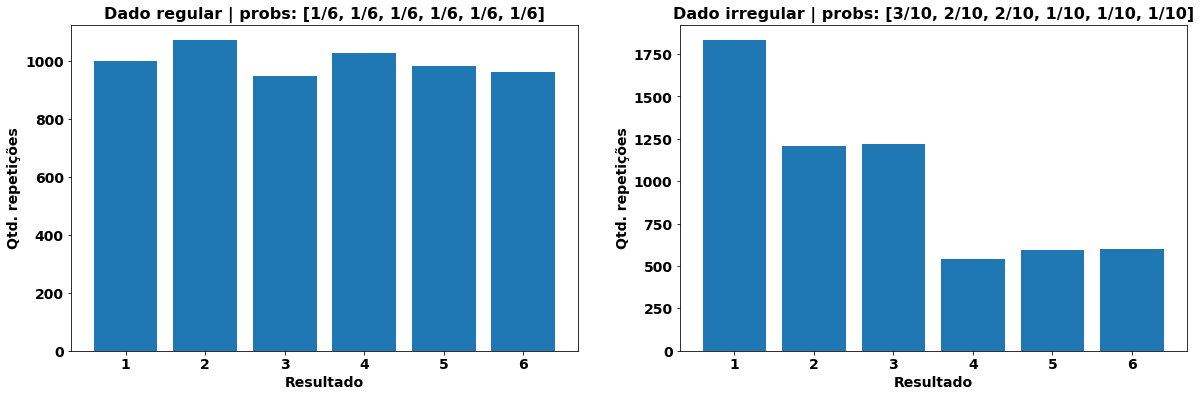

In [7]:
plt.figure(figsize=[20,6])


plt.subplot(1,2,1)
plt.bar(serie_reg.value_counts().index, serie_reg.value_counts().values)
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel("Resultado",fontsize = 14, fontweight = 'bold')
plt.ylabel("Qtd. repetições",fontsize = 14, fontweight = 'bold')
plt.title("Dado regular | probs: [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]", fontsize = 16, fontweight = 'bold')

plt.subplot(1,2,2)
plt.bar(serie_irreg.value_counts().index, serie_irreg.value_counts().values)
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 14, fontweight = 'bold')
plt.xlabel("Resultado",fontsize = 14, fontweight = 'bold')
plt.ylabel("Qtd. repetições",fontsize = 14, fontweight = 'bold')
plt.title("Dado irregular | probs: [3/10, 2/10, 2/10, 1/10, 1/10, 1/10]", fontsize = 16, fontweight = 'bold')

plt.show()

<br><br>

No caso do exemplo anterior, a variável X era __discreta__, pois os valores que X podia assumir eram apenas 1,2,3,4,5,6.

<br>

## 2. Variáveis aleatórias contínuas

<br>

Agora considere que X seja o resultado da medição da __altura de uma pessoa.__ Neste caso, X pode assumir qualquer valor real, desta forma X é uma variável aleatória __contínua.__

Vamos trabalhar um pouco mais nesse exemplo: X = altura de pessoas.

Neste caso, não podemos enunciar todos os valores de X e atribuir a cada um deles uma probabilidade. 

No entanto, logicamente é muito mais provável que a altura de uma pessoa esteja entre [1.5m, 1.8m] do que [1.9m, 2.1m].

Além disso, é muito improvável que uma pessoa tenha altura maior do que 2m e quase impossível alguém ter mais do que 2.5m...

Como podemos definir a __distribuição__ de X neste caso?!


No caso em que X era discreto - lançamento de um dado - as distribuições eram:

In [8]:
def distr_X_lanc_dado_regular(x):
    return 1/6

def distr_X_lanc_dado_irregular(x):
    if x == 1:
        return 3/10
    if x == 2:
        return 2/10
    if x == 3:
        return 2/10
    if x == 4:
        return 1/10
    if x == 5:
        return 1/10
    if x == 6:
        return 1/10

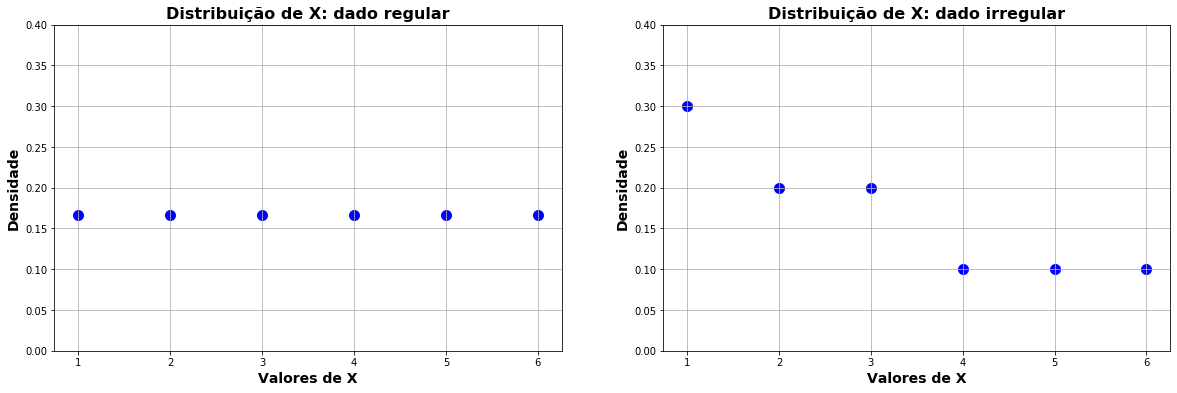

In [9]:
xvals = [1,2,3,4,5,6]

plt.figure(figsize = [20,6])
plt.subplot(1,2,1)
plt.scatter(xvals, [distr_X_lanc_dado_regular(x) for x in xvals],  s = 100, c = 'blue')
plt.title("Distribuição de X: dado regular", fontsize = 16, fontweight = 'bold')
plt.xlabel("Valores de X", fontsize = 14, fontweight = 'bold')
plt.ylabel("Densidade", fontsize = 14, fontweight = 'bold')
plt.ylim([0,0.4])
plt.grid()
plt.subplot(1,2,2)
plt.scatter(xvals, [distr_X_lanc_dado_irregular(x) for x in xvals],  s = 100, c = 'blue')
plt.title("Distribuição de X: dado irregular", fontsize = 16, fontweight = 'bold')
plt.xlabel("Valores de X", fontsize = 14, fontweight = 'bold')
plt.ylabel("Densidade", fontsize = 14, fontweight = 'bold')
plt.ylim([0,0.4])
plt.grid()
plt.show()

Podemos fazer o mesmo no caso em que X é contínua - por ex, altura das pessoas!

Desta forma, podemos __modelar__ X de modo que para qualquer valor que X assuma, tenhamos uma densidade atribuida.

Essa função densidade caracteriza a __distribuição de X!__

Finalmente, podemos definir a __distribuição gaussiana:__

Uma variável aleatória contínua __X segue a distribuição gaussiana__ com __média__ $\mu$ e desvio padrão $\sigma$ se a densidade de X for modelada de acordo:


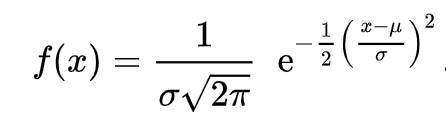

Nesta fórmula, os valores de $\mu$ e $\sigma$ estão fixados. Para cada valor de $x$, podemos calcular a densidade $f(x)$. Quanto maior for essa densidade no ponto $x$, mais provável é de retirarmos um valor próximo do ponto.

A distribuição gaussiana também é conhecida por __distribuição normal.__

Vamos implementar essa função no python para analisarmos melhor:

In [10]:
def distr_gaussiana(x, media, desvio_padrao):
    return (1 / (desvio_padrao * np.sqrt(2 * np.pi))) * np.exp( (-0.5) * ((x - media)/desvio_padrao)**2 )

Abaixo, vamos __modelar__ X com distribuição gaussiana com média 0 e desvio padrão 1:

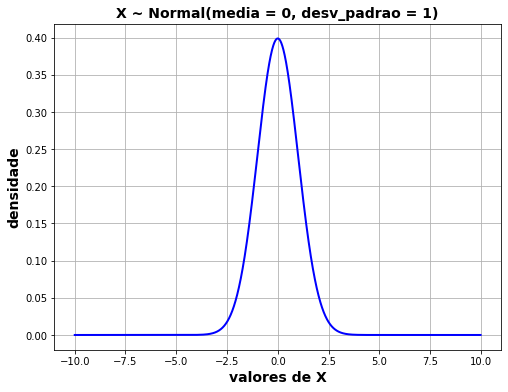

In [11]:
media = 0
desvio_padrao = 1

xlims = np.arange(-10,10,0.01)
distr_gaus = [distr_gaussiana(x, media, desvio_padrao) for x in xlims]

plt.figure(figsize=[8,6])
plt.plot(xlims, distr_gaus, lw = 2, c = 'blue')
plt.xlabel("valores de X",fontsize = 14, fontweight = 'bold')
plt.ylabel("densidade",fontsize = 14, fontweight = 'bold')
plt.title("X ~ Normal(media = 0, desv_padrao = 1)",fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

__Faz sentido dizer que X, altura de pessoas, segue essa distribuição?!__

De acordo com o distribuição acima, os valores mais prováveis de X é em torno de X = 0. Além disso, X pode assumir valores negativos...

então me parece que essa não é a melhor modelagem para X = altura de pessoas.

Mas.. e se mudarmos os parâmetros média e desvio padrão?

Considere o exemplo:

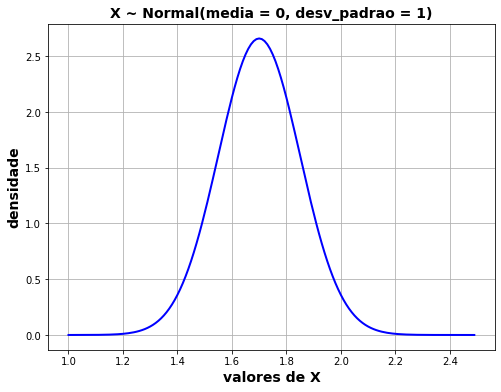

In [12]:
media = 1.7
desvio_padrao = 0.15

xlims = np.arange(1,2.5,0.01)
distr_gaus = [distr_gaussiana(x, media, desvio_padrao) for x in xlims]

plt.figure(figsize=[8,6])
plt.plot(xlims, distr_gaus, lw = 2, c = 'blue')
plt.xlabel("valores de X",fontsize = 14, fontweight = 'bold')
plt.ylabel("densidade",fontsize = 14, fontweight = 'bold')
plt.title("X ~ Normal(media = 0, desv_padrao = 1)",fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show()

__Agora sim parece que essa ditribuição descreve muito melhor X = altura de pessoas!__

<br><br>

Existem várias outras distribuições, mas a __distribuição normal__ é a distribuição mais conhecida e usada dentro de modelagem estatística. Vários fenômenos da natureza podem ser modelados a partir dessa distribuição.

__Pergunta:__ como escolher o melhor conjunto de parâmetros média e desvio padrão para a modelagem?

Considere que temos um dataset com N medições:

In [13]:
df = pd.read_csv("amostra_peso.csv")
df

,peso
0,68.274190
1,78.741608
2,57.611786
3,71.981410
4,70.352047
...,...
995,54.572915
996,57.630028
997,64.495779
998,55.728467


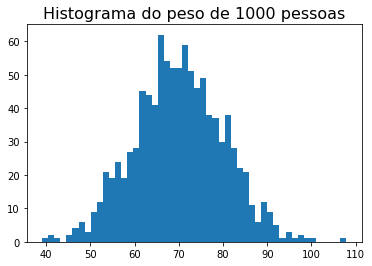

In [14]:
plt.hist(df.peso, bins = 50)
plt.title("Histograma do peso de 1000 pessoas", fontsize = 16)
plt.show()

Parece que segue uma distribuição normal! 

Como podemos modelar X = peso das pessoas de acordo com essa amostra?

Podemos __usar a própria amostra__ para aproximar os valores da média $\mu$ e desvio padrão $\sigma$:

In [15]:
#módulo para trabalhar com distribuições estatísticas em python
import scipy.stats as st

In [16]:
media_amostral = df.peso.mean()
desvio_padrao_amostral = df.peso.std()

#criando a variável aleatória X no python
X = st.norm(loc = media_amostral, scale = desvio_padrao_amostral)

__Simulando valores de X:__

a função "rvs" gera valores random, ou seja, aleatórios, a partir da distribuição.

In [17]:
X.rvs(1)

array([65.67298097])

In [18]:
X.rvs(10)

array([91.65655956, 61.85461927, 77.43751306, 75.19626953, 81.52494625,
       93.7370934 , 72.41049694, 76.85892241, 69.89030508, 59.80087887])

Vamos gerar 5000 valores aleatórios e comparar os resultados:

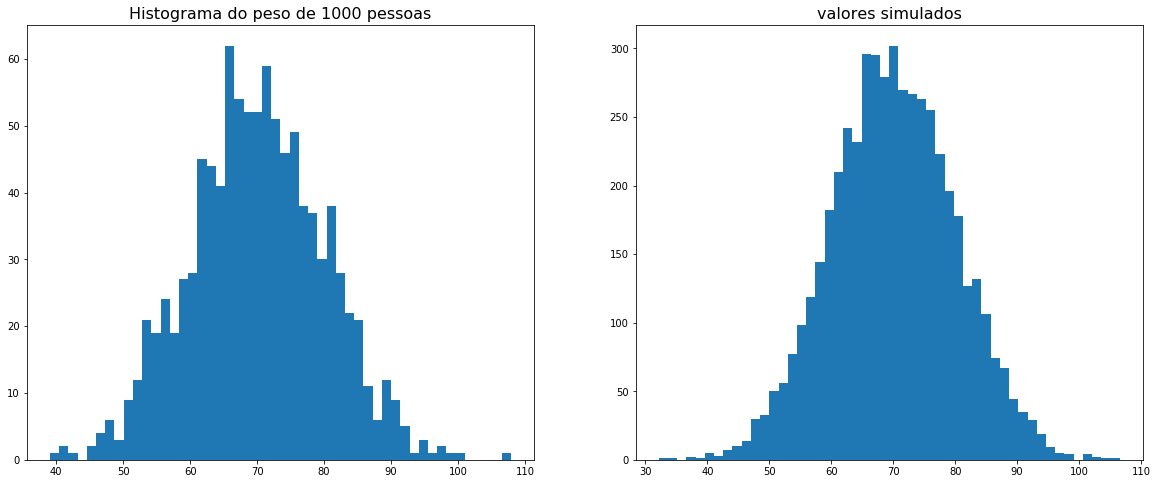

In [19]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)

plt.hist(df.peso, bins = 50)
plt.title("Histograma do peso de 1000 pessoas", fontsize = 16)

plt.subplot(1,2,2)

plt.hist(X.rvs(5000), bins = 50)
plt.title("valores simulados", fontsize = 16)
plt.show()

__Veja quanta semelhança!!__

Qual a função de densidade para esse X?

Podemos usar a função "pdf" para isso. "pdf" significa probability density function!

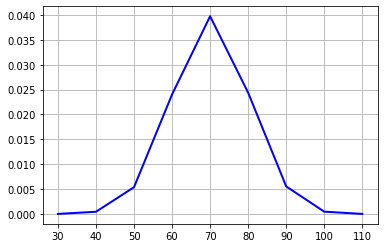

In [20]:
xvals = [30,40,50,60,70,80,90,100,110]

plt.plot(xvals, [X.pdf(x) for x in xvals], lw = 2, c = 'blue')
plt.grid()
plt.show()

<br>

Agora que já entendemos bastante a respeito da distribuição normal, vamos começar a falar sobre detecção de anomalias e faremos forte uso da distribuição normal neste tema!

<br><br>

## 3. Detecção de anomalias: Motivação

<br>

Considere o seguinte problema:

Você é um cientista de dados que trabalha no ramo de aviação. Uma vez que um novo motor é construído, testes precisam ser executados para garantir que este motor esteja em bom estado.

Considere que você tenha acesso a duas medidas de teste do motor: o calor gerado e a intensidade de vibração.

Além disso, você possui uma base histórica com essas variáveis de outros motores que já foram testados e funcionam bem:

In [21]:
df = pd.read_csv("dataset_deteccao_anomalias_motor_aviacao.csv")
print(df.shape)
df.head()

(150, 2)


,calor,vibracao
0,9.353765,20.449382
1,9.600833,19.464194
2,9.474736,20.399310
3,10.907298,21.550562
4,9.650701,19.057824


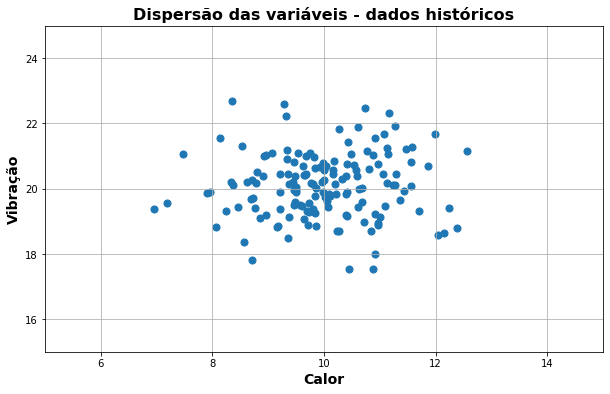

In [22]:
plt.figure(figsize=[10,6])
plt.title("Dispersão das variáveis - dados históricos",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

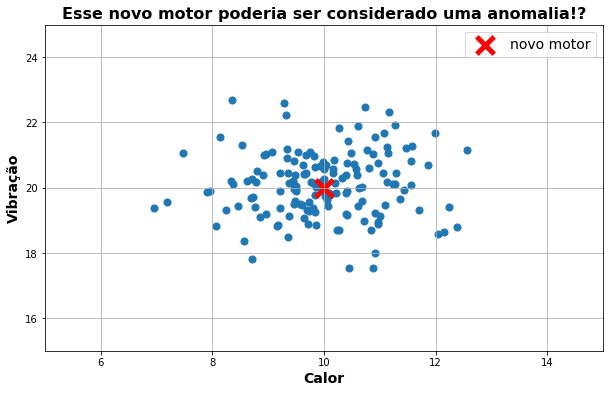

In [23]:
calor_novoMotor = 10
vibracao_novoMotor = 20

plt.figure(figsize=[10,6])
plt.title("Esse novo motor poderia ser considerado uma anomalia!?",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.scatter(calor_novoMotor, vibracao_novoMotor, s = 300, marker = 'x', lw = 5, c = 'red', label = 'novo motor')
plt.legend(fontsize = 14)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

<br><br>

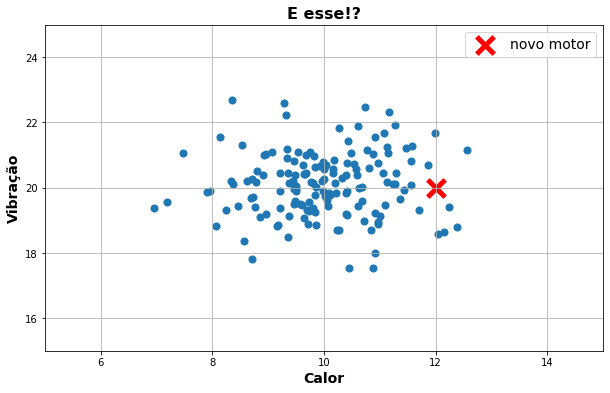

In [24]:
calor_novoMotor = 12
vibracao_novoMotor = 20

plt.figure(figsize=[10,6])
plt.title("E esse!?",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.scatter(calor_novoMotor, vibracao_novoMotor, s = 300, marker = 'x', lw = 5, c = 'red', label = 'novo motor')
plt.legend(fontsize = 14)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

<br><br>

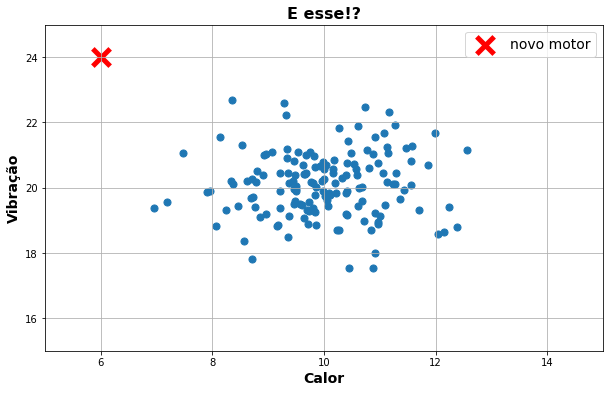

In [25]:
calor_novoMotor = 6
vibracao_novoMotor = 24

plt.figure(figsize=[10,6])
plt.title("E esse!?",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 50)
plt.scatter(calor_novoMotor, vibracao_novoMotor, s = 300, marker = 'x', lw = 5, c = 'red', label = 'novo motor')
plt.legend(fontsize = 14)
plt.xlim([5,15])
plt.ylim([15,25])
plt.grid()
plt.show()

<br><br>

Essencialmente, um método para respondermos a essas perguntas seria:

__1: Modelar os dados de treino com uma distribuição específica.__

__2: A partir desta distribuição, calcular a probabilidade de encontrarmos esse novo motor.__

__3: Se a probabilidade for baixa (menor do que um limiar fixado), então dizemos que o novo motor é uma anomalia. Caso contrário, diremos que não é uma anomalia.__

<br>

Pronto! Usando os conceitos de distribuição e probabilidade estudados anteriormente, podemos definir um algoritmo para detecção de anomalias!

<br><br>


## 4. Detecção de anomalias: Algoritmo

<br>

Denote por X1 a variável aletória que mede o calor nos motores e por X2 a variável aleatória que mede a vibração.

Utilizando o dataset de treino, podemos modelar X1 e X2 com distribuições gaussianas, cada um com uma média e um desvio padrão calculados a partir dos dados.

Agora, considerando um vetor 2-dimensional $x = [x1,x2]$, podemos definir:

$ p(x) = p(x1) \cdot p(x2) $, em que $p(x1)$ é a densidade de $x1$, de acordo com a gaussiana definida e analogamente para $x2$.

Desta forma, se $p(x)$ for menor do que um limiar $\epsilon$, dizemos que o vetor $x$ é uma anomalia. Caso contrário, não é uma anomalia.

__Obs.:__ veja que o algoritmo acima pode ser generalizado!

Considere que temos um dataset com p variáveis $X_1$, ..,  $X_p$. Podemos calcular:

$\mu_1, \sigma_1$: média e desvio padrão de $X_1$ 

$\mu_2, \sigma_2$: média e desvio padrão de $X_2$ 

..

$\mu_p, \sigma_p$: média e desvio padrão de $X_p$ 

e modelar:

$X_1$ ~  $Normal(\mu_1, \sigma_1)$, $X_2$ ~ $Normal(\mu_2, \sigma_2)$, .., $X_p$ ~ $Normal(\mu_p, \sigma_p)$

Então, definir 

### $ p(x) = p(x1) \cdot p(x2) \cdot .. \cdot p(x_p)$ 
para um vetor $x = [x_1, x_2, .., x_p]$.

Dessa forma, __$x$ será anomalia caso $p(x) \lt \epsilon$.__

Implementando em python:

In [26]:
class DetectorAnomalias():
    
    def __init__(self, epsilon):
        self.epsilon = epsilon
        
    def fit(self, X):
        medias = X.mean(axis = 0)
        desvios = X.std(axis = 0)
        gaussianas = [st.norm(loc = m, scale = d) for m, d in zip(medias, desvios)]  
        self.gaussianas = gaussianas
        self.X = X
        
    def prob(self, x):
        p = 1
        for i in range(self.X.shape[1]):
            gaussiana_i = self.gaussianas[i]
            x_i = x[i]
            p *= gaussiana_i.pdf(x_i)
        return p
    
    def isAnomaly(self, x):
        return int(np.where(self.prob(x) < self.epsilon, 1, 0))

In [27]:
df.head()

,calor,vibracao
0,9.353765,20.449382
1,9.600833,19.464194
2,9.474736,20.399310
3,10.907298,21.550562
4,9.650701,19.057824


In [28]:
X = df.values

In [29]:
#instanciando o algoritmo
ann = DetectorAnomalias(epsilon = 0.001)
ann.fit(X)

In [30]:
#fazendo testes
x = X[0, ]
x

array([ 9.35376523, 20.44938184])

In [31]:
ann.prob(x)

0.11968282091264984

In [32]:
ann.isAnomaly(x)

0

In [33]:
x_teste = np.array([6,20])
x_teste

array([ 6, 20])

In [34]:
print(ann.prob(x_teste))
print(ann.isAnomaly(x_teste))

0.00012932693620458093
1


<br>

Vamos, abaixo, plotar alguns gráficos que resumem o resultado do algoritmo.

Plotaremos as curvas de probabilidade de cada ponto e a divisão binária entre ser ou não uma anomalia.

Além disso, vamos comparar dois detectores de anomalia com limiares distintos e ver como isso afeta as predições.

<br>

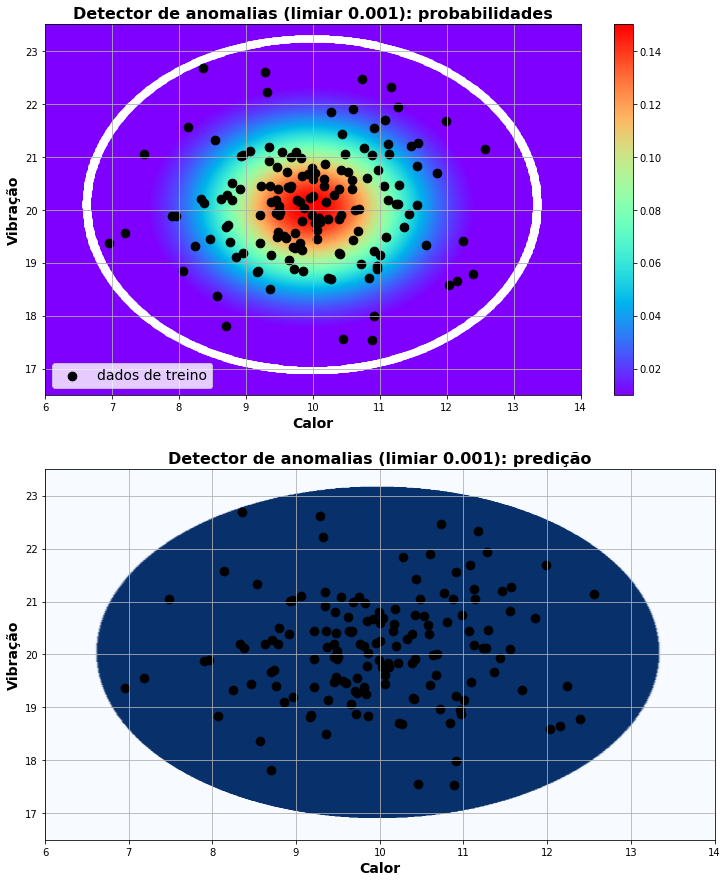

In [35]:
xx = np.arange(6,14, 0.01)
yy = np.arange(16.5,23.5, 0.01)

xx0, xx1 = np.meshgrid(xx, yy)
grid0 = xx0.ravel()
grid1 = xx1.ravel()
grid = np.c_[grid0, grid1]

lista_anomalia = []
lista_prob = []
L=[]
for x in grid: #selecionando os pontos cuja probabilidade está muito próxima do limiar epsilon pré-fixado.
    lista_anomalia.append( ann.isAnomaly(x) )
    lista_prob.append( ann.prob(x) )
    
    if (( (ann.epsilon - 0.0001) < ann.prob(x)) & ((ann.epsilon + 0.0001) > ann.prob(x))):
        L.append(x)
    
plt.figure(figsize=[12,15])
plt.subplot(2,1,1)
plt.scatter(grid0, grid1, c = lista_prob, cmap = plt.cm.rainbow)
plt.clim(0.01, 0.15)
plt.colorbar()
for l in L:
    plt.scatter(l[0], l[1], c = 'white', s = 10)

plt.title("Detector de anomalias (limiar 0.001): probabilidades",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black', label = 'dados de treino')
plt.legend(loc = 'lower left', fontsize = 14)

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.subplot(2,1,2)
plt.title("Detector de anomalias (limiar 0.001): predição",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(grid0, grid1, c = lista_anomalia, cmap = plt.cm.Blues_r)
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black')

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.show()

<br><br>

__Vamos alterar o limiar (aumentá-lo 10x) e comparar os resultados:__

<br><br>

In [36]:
ann = DetectorAnomalias(epsilon = 0.01)
ann.fit(X)

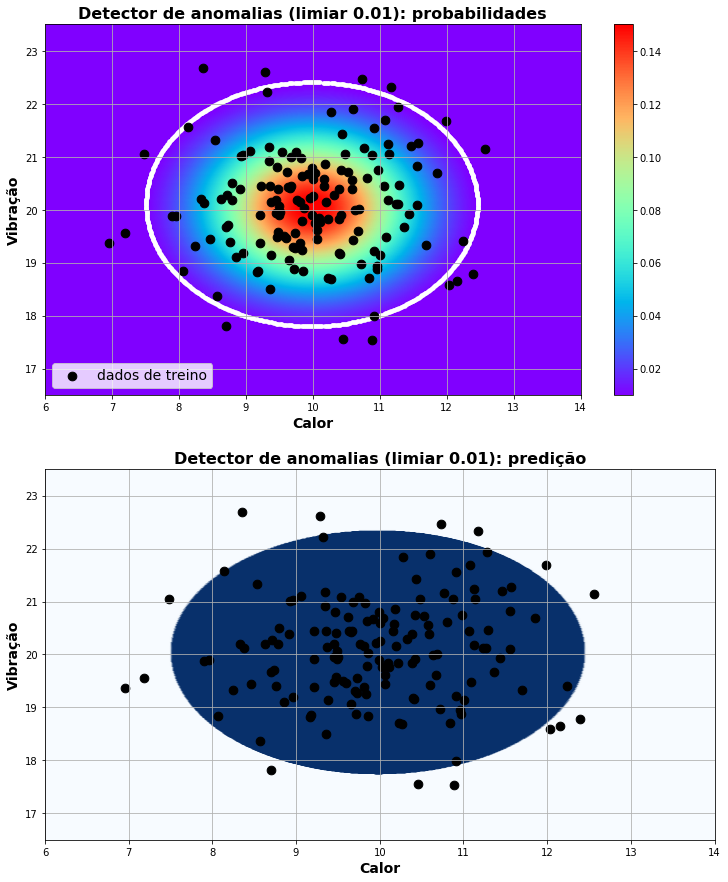

In [37]:
xx = np.arange(6,14, 0.01)
yy = np.arange(16.5,23.5, 0.01)

xx0, xx1 = np.meshgrid(xx, yy)
grid0 = xx0.ravel()
grid1 = xx1.ravel()
grid = np.c_[grid0, grid1]

lista_anomalia = []
lista_prob = []
L=[]
for x in grid:
    lista_anomalia.append( ann.isAnomaly(x) )
    lista_prob.append( ann.prob(x) )
    
    if (( (ann.epsilon - 0.0001) < ann.prob(x)) & ((ann.epsilon + 0.0001) > ann.prob(x))):
        L.append(x)
    
plt.figure(figsize=[12,15])
plt.subplot(2,1,1)
plt.scatter(grid0, grid1, c = lista_prob, cmap = plt.cm.rainbow)
plt.clim(0.01, 0.15)
plt.colorbar()
for l in L:
    plt.scatter(l[0], l[1], c = 'white', s = 10)

plt.title("Detector de anomalias (limiar 0.01): probabilidades",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black', label = 'dados de treino')
plt.legend(loc = 'lower left', fontsize = 14)

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.subplot(2,1,2)
plt.title("Detector de anomalias (limiar 0.01): predição",fontsize = 16, fontweight = 'bold')
plt.xlabel("Calor",fontsize = 14, fontweight = 'bold')
plt.ylabel("Vibração",fontsize = 14, fontweight = 'bold')
plt.scatter(grid0, grid1, c = lista_anomalia, cmap = plt.cm.Blues_r)
plt.scatter(df.calor, df.vibracao, s = 75, c = 'black')

plt.xlim([6,14])
plt.ylim([16.5,23.5])
plt.grid()

plt.show()

<br><br>

Vemos que ao alterar o limiar $\epsilon$, os resultados mudam bastante!

No primeiro caso, considerando o limiar em 0.001, nenhuma instância foi rotulada como anomalia. Ao trocar para 0.01, já tivemos alguns casos positivos.

<br>

Mas.. fica a pergunta:

__Qual o limiar $\epsilon$ que devemos considerar?__

<br><br>


## 5. Detecção de anomalias: Avaliação do algoritmo


<br>


Vamos, abaixo, discutir uma __metodologia__ para avaliar nosso detector de anomalias.

Considere que temos uma base de dados histórica com 10000 motores normais, isto é, não são anomalias; e 50 motores com problemas, que iremos caracterizá-los como anomalias.

Faremos a seguinte divisão nos dados:

__Dataset de treino:__ 6000 instâncias não anômalas.

__Dataset de validação:__ 2000 instâncias não anômalas & 25 instâncias anômalas.

__Dataset de teste:__ 2000 instâncias não anômalas & 25 instâncias anômalas.


Desta forma, usaremos os dados de treino para calcular as médias e desvios padrões de cada uma das variáveis explicativas, de modo a podermos calcular __p(x).__

Usando o conjunto de validação, poderemos definir o melhor limiar $\epsilon$. Finalmente, avaliaremos nos dados de teste se nosso modelo está generalizando bem.

Neste caso, as métricas de avaliação são as métricas de classificação binária, como AUC, F1-score, etc.

__Obs.:__ Também é possível aplicar validação cruzada em vez de fazer a divisão em treino/validação/teste.

<br>

Desta forma, mesmo que o detector de anomalias seja não supervisionado, fazemos usos de metodologias e métricas do contexto supervisionado!

<br><br>

### Detector de anomalias Versus aprendizagem supervisionada

<br>

O exemplo acima pode ser interpretado como um problema de classificação binária, visto que temos a variável target (marcação de anomalia) com exemplos positivos (anomalias) e negativos (não anomalias).

Desta forma, teoriamente, é possível treinar modelos supervisionados e tentar reconhecer as anomalias.

No entanto, alguns pontos de atenção precisam ser levantados:

1) Caso tenhamos muito poucos exemplos da classe positiva, pode ser complicado que um algoritmo supervisionado aprenda o padrão dos dados. Neste caso, a abordagem não supervisionada pode ser interessante.

2) Podem existir vários tipos diferentes de anomalias. Novamente, com poucos dados rotulados, pode ser difícil conseguir conseguir detectar todos os padrões.

<br>

Concluindo, a mensagem final é que é necessário atenção ao problema em particular e que não existe receita de bolo! Desta forma, é trabalho do cientista de dados testar várias alternativas até encontrar a que melhor se encaixa na questão!